In [3]:
#takes 
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
import hepran
import hepran.bzipscore as bz
from hepran.bzipscore import *
import hepran.utils as u
import hepran.registers as r
import numpy as np
CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")
from glob import glob
import pandas as pd
from StringIO import StringIO
import collections

d:\data\ortoCC\fine_tune_scoring_function\OUT_SETS


In [39]:
ge_pos = list("REKQADTSMHWY")
aa_pos = list("ILVNSTRDEKHYA")

In [40]:
def aga_l(N):
    return N*(N-1)/2+N
  

skeleton
```
P1: D EIAALEA ENAALEA ENAALEA EIAALEA
P2: D KIAALKA KNAALKA KNAALKA KIAALKA


P5: D ENAALEA KIAALKA KNAALKA EIAALEA
P6: D KNAALKA EIAALEA ENAALEA KIAALKA

P7: D EIAALEA KNAALKA KIAALKA ENAALEA
P8: D KIAALKA ENAALEA EIAALEA KNAALKA
```    

In [41]:
skeletons = u.load_fasta("!05_cross_pairs/PNIC.aA.fasta") 
fasta_out = collections.OrderedDict()
pairs_out = []

In [42]:
def insert_aa_pos(id1, id2, aa_pos, two_hep=False):
    sk1 = skeletons[id1]
    sk2 = skeletons[id2]
    rid1 = r.get_register_indices(sk1, 'f')
    rid2 = r.get_register_indices(sk2, 'f')
    for i in xrange(len(aa_pos)):
        for j in xrange(len(aa_pos)-1):
            rid1.set_reg('a', 1, aa_pos[i])
            rid2.set_reg('a', 1, aa_pos[j])
            hid="1Haa"
            if two_hep:
                hid = "12Haa"
                rid1.set_reg('a', 2, aa_pos[i])
                rid2.set_reg('a', 2, aa_pos[j])        
            id1_out ="{id1}-{hid}-{aa_pos}".format(id1=id1, hid=hid, aa_pos=aa_pos[i])
            id2_out ="{id2}-{hid}-{aa_pos}".format(id2=id2, hid=hid, aa_pos=aa_pos[j])
            fasta_out[id1_out] = rid1.get_seq_str()
            fasta_out[id2_out] = rid2.get_seq_str()
            pairs_out.append((id1_out,id2_out))
            
def insert_ge_pos(id1, id2, ge_pos, two_hep=False):
    sk1 = skeletons[id1]
    sk2 = skeletons[id2]
    rid1 = r.get_register_indices(sk1, 'f')
    rid2 = r.get_register_indices(sk2, 'f')
    for i in xrange(len(ge_pos)):
        for j in xrange(len(ge_pos)-1):
            #print(ge_pos[i], ge_pos[j])
            rid1.set_reg('g', 1, ge_pos[i])
            rid1.set_reg('e', 1, ge_pos[i])
            rid2.set_reg('g', 1, ge_pos[j])
            rid2.set_reg('e', 1, ge_pos[j])
            hid="1Hge"
            if two_hep:
                hid = "12Hge"
                rid1.set_reg('g', 2, ge_pos[i])
                rid1.set_reg('e', 2, ge_pos[i])
                rid2.set_reg('g', 2, ge_pos[j])
                rid2.set_reg('e', 2, ge_pos[j])        
            id1_out ="{id1}-{hid}-{ge_pos}".format(id1=id1, hid=hid, ge_pos=ge_pos[i])
            id2_out ="{id2}-{hid}-{ge_pos}".format(id2=id2, hid=hid, ge_pos=ge_pos[j])
            fasta_out[id1_out] = rid1.get_seq_str()
            fasta_out[id2_out] = rid2.get_seq_str()
            pairs_out.append((id1_out,id2_out))


In [43]:
#insert aa
insert_aa_pos("P5-aA", "P6-aA", aa_pos, two_hep=False)
insert_aa_pos("P5-aA", "P6-aA", aa_pos, two_hep=True)
insert_aa_pos("P1-aA", "P2-aA", aa_pos, two_hep=False)
insert_aa_pos("P1-aA", "P2-aA", aa_pos, two_hep=True)        
    
#insert ge
insert_ge_pos("P5-aA", "P6-aA", ge_pos, two_hep=False)
insert_ge_pos("P5-aA", "P6-aA", ge_pos, two_hep=True)
insert_ge_pos("P1-aA", "P2-aA", ge_pos, two_hep=False)
insert_ge_pos("P1-aA", "P2-aA", ge_pos, two_hep=True)        
    

In [44]:
print(len(pairs_out))
pairs_out;

1152


In [45]:
print(len(fasta_out))
fasta_out;

192


In [46]:
u.save_dict_to_fasta(fasta_out, '!05_cross_pairs/aa_ge_crosspairs.fasta')

In [47]:
u.save_set(pairs_out, '!05_cross_pairs/aa_ge_crosspairs.pairs')

In [48]:
#cd !05_cross_pairs
#bzipscore.pl aa_ge_crosspairs.pairs aa_ge_crosspairs.fasta > aa_ge_crosspairs.out

In [4]:
scores = bz.load_score_file('!05_cross_pairs/aa_ge_crosspairs.out')

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_context('talk',  font_scale=1.5)
#sns.set_style('white')

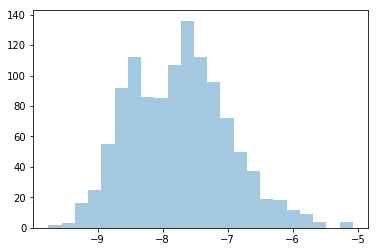

In [6]:
sns.distplot(scores.values(),kde=False, norm_hist=False)

In [7]:
def get_hep_from_name(_str):
    #print(_str)
    return _str.split('-')[2]
def get_pep_from_name(str1,str2):
    return str1.split('-')[0] +"-"+str2.split('-')[0]

In [8]:
dicts = [dict(ID1=k[0], ID2=k[1], score=scores[k], hept=get_hep_from_name(k[0]), scaffold=get_pep_from_name(*k))  for k in scores.keys()]
df = pd.DataFrame.from_dict(dicts)

In [9]:
df.hept.unique()

array(['1Haa', '12Haa', '1Hge', '12Hge'], dtype=object)

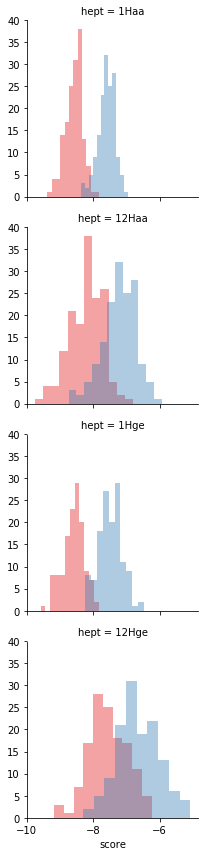

In [15]:
g = sns.FacetGrid(df, hue='scaffold', row="hept", palette="Set1")
g = g.map(sns.distplot, "score", kde=False, norm_hist=False)